In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df=pd.read_csv('trainx.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [12]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [14]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

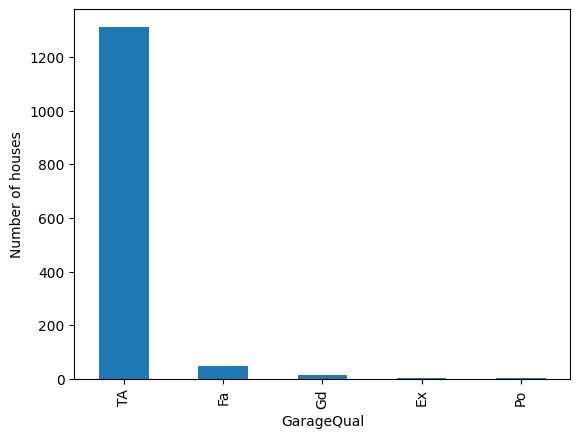

In [20]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [21]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

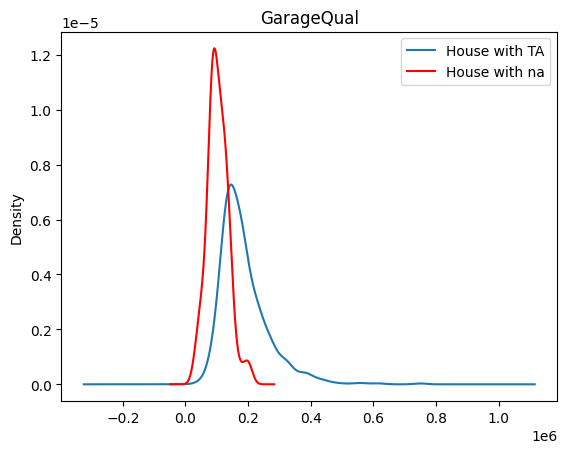

In [31]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['House with TA','House with na']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

In [32]:
trmp=df[df['GarageQual']=='TA']['SalePrice']

In [33]:
df['GarageQual'].fillna('TA',inplace=True)

<AxesSubplot: >

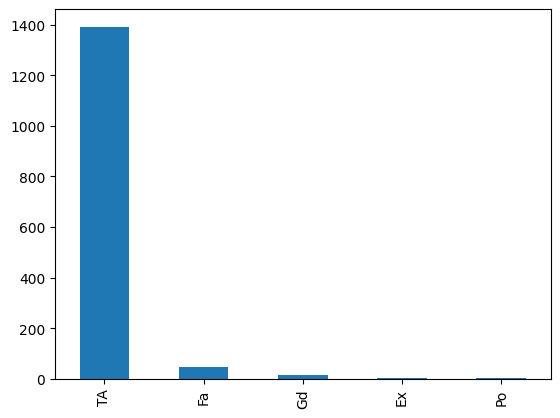

In [35]:
df['GarageQual'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='Density'>

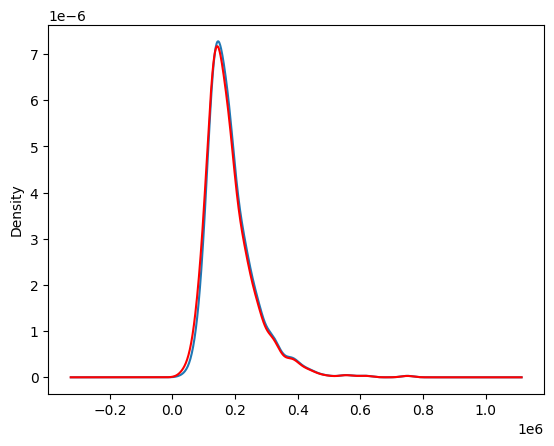

In [46]:
fig=plt.figure()
ax=fig.add_subplot(111)
trmp.plot(kind='kde',ax=ax)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [53]:
from sklearn.impute import SimpleImputer

In [54]:
imputer =SimpleImputer(strategy='most_frequent')

In [56]:
x_train= imputer.fit_transform(x_train)
x_test=imputer.fit_transform(x_test)

In [57]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)